# Feature Selection

In [182]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

Looking at the linearity of the filters in the scatter plot, I think just apply pca to the filters and ignore the autencoder completely

In [183]:

X_train = pd.read_csv('data/ClassBalanced/xtrain.csv')
X_test = pd.read_csv('data/xtest.csv')

#X_train = pd.read_csv('data/xtrainscale.csv') # used to use scaled version of xtrain and xtest, doesn't make sense to use scaled. The scaled was for pca only
#X_test = pd.read_csv('data/xtestscale.csv')

#X_train_ae = pd.read_csv('data/EncoderGenerated/xtrainencoder2.csv')
#X_test_ae = pd.read_csv('data/EncoderGenerated/xtestencoder2.csv')

# X_train_pca = pd.read_csv('data/pcagenerated/xtrainpca.csv')
# X_test_pca = pd.read_csv('data/pcagenerated/xtestpca.csv')

y_train = pd.read_csv('data/ClassBalanced/ytrain.csv')
y_test = pd.read_csv('data/ytest.csv')

# #X_train_merge = pd.merge(X_train, X_train_ae, left_index=True, right_index=True)
# X_train_merge = pd.merge(X_train, X_train_pca, left_index=True, right_index=True)
# X_train_merge.head()

In [184]:
X_train.describe()

,u,g,r,i,z,redshift
count,119325.000000,119325.000000,119325.000000,119325.000000,119325.000000,119325.000000
mean,21.772300,20.487458,19.724071,19.279069,19.019695,0.710210
std,2.162104,1.943326,1.820612,1.771476,1.792748,0.906985
min,10.996230,10.511390,9.822070,9.469903,9.612333,-0.007352
25%,20.223750,19.072600,18.415244,18.054370,17.792975,0.000051
50%,21.763299,20.883490,20.191365,19.602380,19.258790,0.421409
75%,23.237740,21.864802,21.107000,20.658840,20.381920,1.113367
max,32.781390,29.862580,29.571860,32.141470,29.383740,7.011245


In [185]:
X_train_merge.columns

Index(['u', 'g', 'r', 'i', 'z', 'redshift', 'PC1', 'PC2', 'PC3'], dtype='object')

In [186]:
X_train_merge.columns

Index(['u', 'g', 'r', 'i', 'z', 'redshift', 'PC1', 'PC2', 'PC3'], dtype='object')

In [187]:
#X_test_merge = pd.merge(X_test, X_test_ae, left_index=True, right_index=True)
#X_test_merge = pd.merge(X_train, X_test_pca, left_index=True, right_index=True)
#X_test_merge.head()

In [188]:
#X_test_merge.describe()

## Scale Features (no)

In [153]:
# scaler = MinMaxScaler() 
# X_train_scaled = scaler.fit_transform(X_train_merge) 
# X_train_scaled_df = pd.DataFrame(X_train_scaled)
# X_train_scaled_df.head()

In [154]:
# scaler = MinMaxScaler() 
# X_test_scaled = scaler.fit_transform(X_test_merge) 
# X_test_scaled_df = pd.DataFrame(X_test_scaled)
# X_test_scaled_df.head()

In [155]:
X_train

,u,g,r,i,z,redshift
0,17.438960,15.984720,15.453350,15.283440,15.218250,-0.000018
1,19.148680,18.089840,17.594960,17.226680,17.007590,0.139176
2,19.131310,18.034590,17.522060,17.185050,17.020530,0.089176
3,19.827890,18.759740,18.375290,18.241360,18.183950,-0.000074
4,20.657190,19.146510,20.994190,29.889210,27.805190,0.144278
...,...,...,...,...,...,...
119320,18.471756,18.854495,19.328720,19.707208,20.027654,-0.003510
119321,18.278332,17.320393,17.029509,16.939980,16.922169,0.000365
119322,24.200051,21.840844,21.518598,21.268502,21.067801,-0.000639
119323,22.045105,20.739304,20.076229,19.783065,19.701208,-0.000279


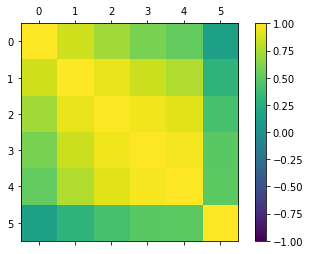

In [189]:
# Correlation?
import matplotlib.pyplot as plt
import numpy as np
corr = X_train.corr()
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(corr, vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = np.arange(0,6,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
#ax.set_xticklabels(range(0, len(names))) 
#ax.set_yticklabels(range(0, len(names))) 
plt.show()

In [157]:
corr

,u,g,r,i,z,redshift
u,1.000000,0.859130,0.723299,0.599336,0.520653,0.135907
g,0.859130,1.000000,0.932291,0.838362,0.761325,0.297426
r,0.723299,0.932291,1.000000,0.960517,0.912811,0.421269
i,0.599336,0.838362,0.960517,1.000000,0.971099,0.488814
z,0.520653,0.761325,0.912811,0.971099,1.000000,0.499938
redshift,0.135907,0.297426,0.421269,0.488814,0.499938,1.000000


r is highly correlated to g, i, z so remove r. Remove i which is highly correlated to z.

In [190]:
X_train.drop(['r', 'i'], axis=1, inplace=True)

In [191]:
X_test.drop(['r', 'i'], axis=1, inplace=True)
#X_test_merge
X_train.to_csv('data/xtrainfs.csv', index=False)
X_test.to_csv('data/xtestfs.csv', index=False)

## Mutual Information Filter

In [192]:
X_train

,u,g,z,redshift
0,17.438960,15.984720,15.218250,-0.000018
1,19.148680,18.089840,17.007590,0.139176
2,19.131310,18.034590,17.020530,0.089176
3,19.827890,18.759740,18.183950,-0.000074
4,20.657190,19.146510,27.805190,0.144278
...,...,...,...,...
119320,18.471756,18.854495,20.027654,-0.003510
119321,18.278332,17.320393,16.922169,0.000365
119322,24.200051,21.840844,21.067801,-0.000639
119323,22.045105,20.739304,19.701208,-0.000279


In [171]:
from sklearn.preprocessing import LabelEncoder
y_train_012 = LabelEncoder().fit_transform(y_train)
y_train_012 = y_train_012.astype(int)
MI_array = mutual_info_classif(X_train_merge.values, y_train_012)
MI_array

/home/fabio/.venv/myproj/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.12218006, 0.15164397, 0.12236095, 0.16598246, 0.19973198,
       0.92615233, 0.10483096, 0.33751234, 0.10414673])

In [172]:
MI_top = sorted(list(zip(MI_array, X_train_merge.columns)), reverse=True)
idx=[j for i,j in MI_top[:4]]#usually top 5
#idx=[1, 4, 5] # testing pca
idx

['redshift', 'PC2', 'z', 'i']

In [173]:
print('Number of features before MI filter: ', MI_array.shape[0])#[5, 10, 6, 4, 3] where 10 is pc 1
# X_train_1 = X_train_scaled_df[idx]
# X_test_1 = X_test_scaled_df[idx]
X_train_1 = X_train_merge[idx]
X_test_1 = X_test_merge[idx]

print('Number of features after MI filter: ', len(idx))
X_train_1.head()

Number of features before MI filter:  9
Number of features after MI filter:  4


,redshift,PC2,z,i
0,-0.000018,0.132591,15.21825,15.28344
1,0.139176,0.205378,17.00759,17.22668
2,0.089176,0.210935,17.02053,17.18505
3,-0.000074,0.427597,18.18395,18.24136
4,0.144278,5.094414,27.80519,29.88921


In [174]:
X_train_1.describe()

,redshift,PC2,z,i
count,119325.000000,1.193250e+05,119325.000000,119325.000000
mean,0.710210,-3.048798e-17,19.019695,19.279069
std,0.906985,7.900824e-01,1.792748,1.771476
min,-0.007352,-5.262136e+00,9.612333,9.469903
25%,0.000051,-5.980457e-01,17.792975,18.054370
50%,0.421409,1.604416e-01,19.258790,19.602380
75%,1.113367,6.822750e-01,20.381920,20.658840
max,7.011245,6.412216e+00,29.383740,32.141470


In [175]:
X_train_1.to_csv('data/xtrainfs.csv', index=False)
X_test_1.to_csv('data/xtestfs.csv', index=False)
X_test_1.head()

,redshift,PC2,z,i
0,-0.000018,-0.550050,15.21825,15.28344
1,0.139176,0.132068,17.00759,17.22668
2,0.089176,-0.855945,17.02053,17.18505
3,-0.000074,-1.197741,18.18395,18.24136
4,0.144278,-0.521745,27.80519,29.88921


## move on to prediction also try pca. Also i think the SAE has too many params. Reduce a layer.

## Try another feature selection technique

In [132]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train_scaled_df, y_train)
importances = model.feature_importances_ 
wrapper_top_10 = sorted(list(zip(importances, X_train_scaled_df.columns)), reverse=True)[:10]
print('Highest importance and feature number', wrapper_top_10, end='\n\n')
# also 5,7, 4

/tmp/ipykernel_189/1192481908.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled_df, y_train)


Highest importance and feature number [(0.5535115233118364, 5), (0.10953338099125601, 7), (0.058836570830480286, 1), (0.05697579704913944, 0), (0.05630813694323054, 4), (0.05292924854886388, 8), (0.04014178297706488, 2), (0.039904040260801465, 3), (0.031859519087327086, 6)]



In [133]:
idx2=[j for i,j in wrapper_top_10[:4]]
print('Number of features before MI filter: ', MI_array.shape[0])#[5, 10, 6, 4, 3] where 10 is pc 1
X_train_1 = X_train_scaled_df[idx2]
X_test_1 = X_test_scaled_df[idx2]
print('Number of features after MI filter: ', len(idx))
X_train_1.head()

Number of features before MI filter:  7
Number of features after MI filter:  4


,5,7,1,0
0,0.001045,0.462101,0.282842,0.295739
1,0.020877,0.468336,0.391627,0.374220
2,0.013753,0.468811,0.388772,0.373423
3,0.001037,0.487370,0.426245,0.405398
4,0.021604,0.887120,0.446232,0.443465
